# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0   
    
    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
        # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | nadi
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | fort st. john
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | shanhecun
Processing Record 7 of Set 1 | zel'va
City not found. Skipping...
Processing Record 8 of Set 1 | atafu village
Processing Record 9 of Set 1 | hadibu
Processing Record 10 of Set 1 | wadebridge
Processing Record 11 of Set 1 | uturoa
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | chibougamau
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | tevragh zeina
City not found. Skipping...
Processing Record 21 of 

Processing Record 36 of Set 4 | pacific grove
Processing Record 37 of Set 4 | luderitz
Processing Record 38 of Set 4 | egilsstadir
Processing Record 39 of Set 4 | cabedelo
Processing Record 40 of Set 4 | hithadhoo
Processing Record 41 of Set 4 | rensselaer
Processing Record 42 of Set 4 | saint-philippe
Processing Record 43 of Set 4 | flin flon
Processing Record 44 of Set 4 | kropyvnytskyi
Processing Record 45 of Set 4 | churachandpur
Processing Record 46 of Set 4 | freetown
Processing Record 47 of Set 4 | kayangel
Processing Record 48 of Set 4 | keetmanshoop
Processing Record 49 of Set 4 | qaqortoq
Processing Record 0 of Set 5 | le port
Processing Record 1 of Set 5 | la passe
Processing Record 2 of Set 5 | belmonte
Processing Record 3 of Set 5 | howrah
Processing Record 4 of Set 5 | crane
Processing Record 5 of Set 5 | paradip garh
Processing Record 6 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 7 of Set 5 | dudinka
Processing Record 8 of Set 5 | afaahiti
Process

Processing Record 25 of Set 8 | daru
Processing Record 26 of Set 8 | melekeok village
Processing Record 27 of Set 8 | bel ombre
Processing Record 28 of Set 8 | fort bragg
Processing Record 29 of Set 8 | sandnessjoen
Processing Record 30 of Set 8 | margate
Processing Record 31 of Set 8 | la junta
Processing Record 32 of Set 8 | alesund
Processing Record 33 of Set 8 | hauterive
Processing Record 34 of Set 8 | palikir - national government center
Processing Record 35 of Set 8 | olinda
Processing Record 36 of Set 8 | cockburn town
Processing Record 37 of Set 8 | hasaki
Processing Record 38 of Set 8 | naze
Processing Record 39 of Set 8 | moree
Processing Record 40 of Set 8 | keflavik
Processing Record 41 of Set 8 | sonqor
Processing Record 42 of Set 8 | ivdel'
Processing Record 43 of Set 8 | sao gabriel da cachoeira
Processing Record 44 of Set 8 | salmas
Processing Record 45 of Set 8 | antofagasta
Processing Record 46 of Set 8 | dryden
Processing Record 47 of Set 8 | macka
Processing Record

Processing Record 18 of Set 12 | gaillimh
Processing Record 19 of Set 12 | myitkyina
Processing Record 20 of Set 12 | trairi
Processing Record 21 of Set 12 | ghat
Processing Record 22 of Set 12 | aubigny-sur-nere
Processing Record 23 of Set 12 | arish
Processing Record 24 of Set 12 | aioun
Processing Record 25 of Set 12 | byron bay
Processing Record 26 of Set 12 | jieshou
Processing Record 27 of Set 12 | metu
Processing Record 28 of Set 12 | marck
Processing Record 29 of Set 12 | nikolayevsk-on-amure
Processing Record 30 of Set 12 | gangapur
Processing Record 31 of Set 12 | opuwo
Processing Record 32 of Set 12 | fruita
Processing Record 33 of Set 12 | road town
Processing Record 34 of Set 12 | ardestan
Processing Record 35 of Set 12 | xining
Processing Record 36 of Set 12 | voi
Processing Record 37 of Set 12 | puerto deseado
Processing Record 38 of Set 12 | zhangatas
Processing Record 39 of Set 12 | as sulaymaniyah
Processing Record 40 of Set 12 | sangueya
Processing Record 41 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,295.49,86,93,15.48,PN,1691536266
1,nadi,-17.8000,177.4167,301.15,54,20,2.57,FJ,1691536437
2,longyearbyen,78.2186,15.6401,281.06,81,0,4.12,SJ,1691536278
3,fort st. john,56.2499,-120.8529,293.50,55,100,3.01,CA,1691536298
4,geraldton,-28.7667,114.6000,284.38,93,75,2.57,AU,1691536317


In [6]:
# Create the 'output_data' directory if it doesn't exist
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,295.49,86,93,15.48,PN,1691536266
1,nadi,-17.8000,177.4167,301.15,54,20,2.57,FJ,1691536437
2,longyearbyen,78.2186,15.6401,281.06,81,0,4.12,SJ,1691536278
3,fort st. john,56.2499,-120.8529,293.50,55,100,3.01,CA,1691536298
4,geraldton,-28.7667,114.6000,284.38,93,75,2.57,AU,1691536317


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

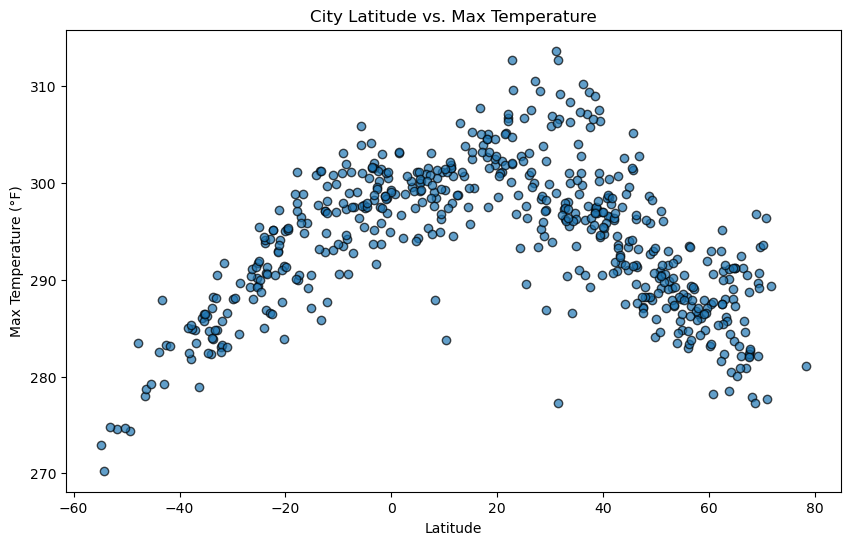

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties

# Set plot title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

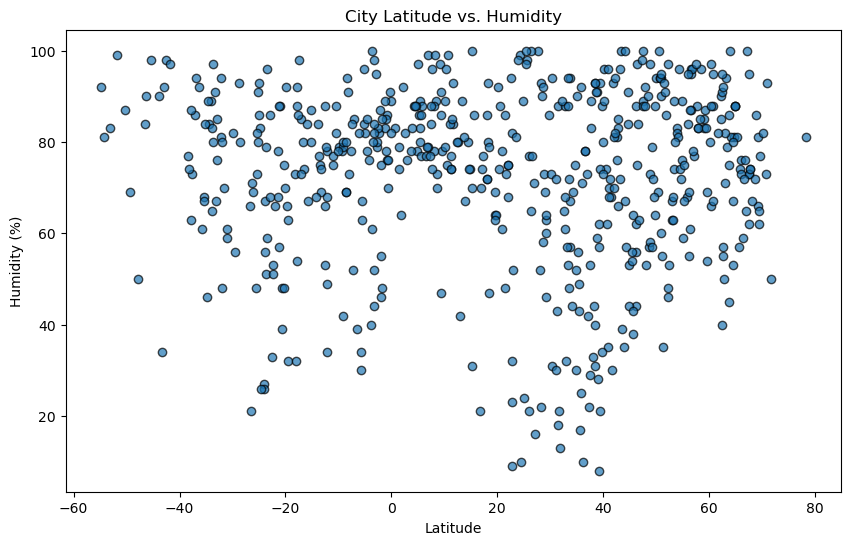

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties

# Set plot title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

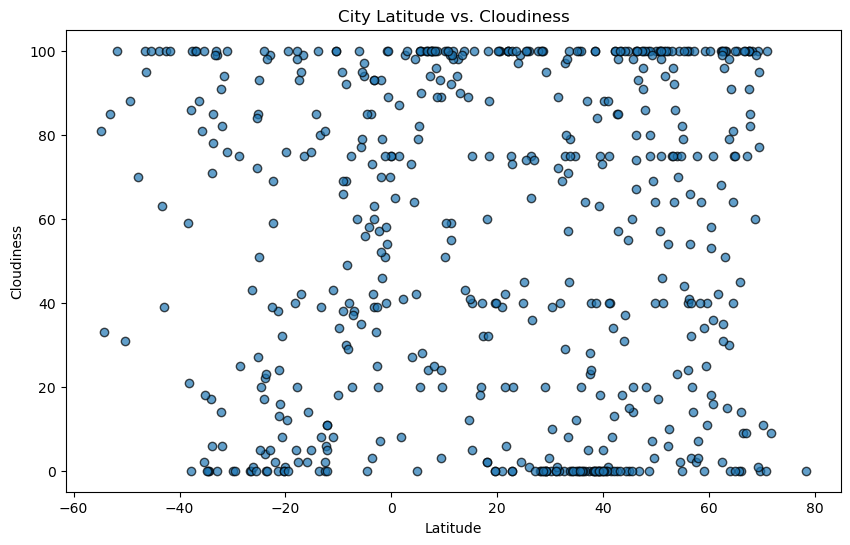

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties

# Set plot title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

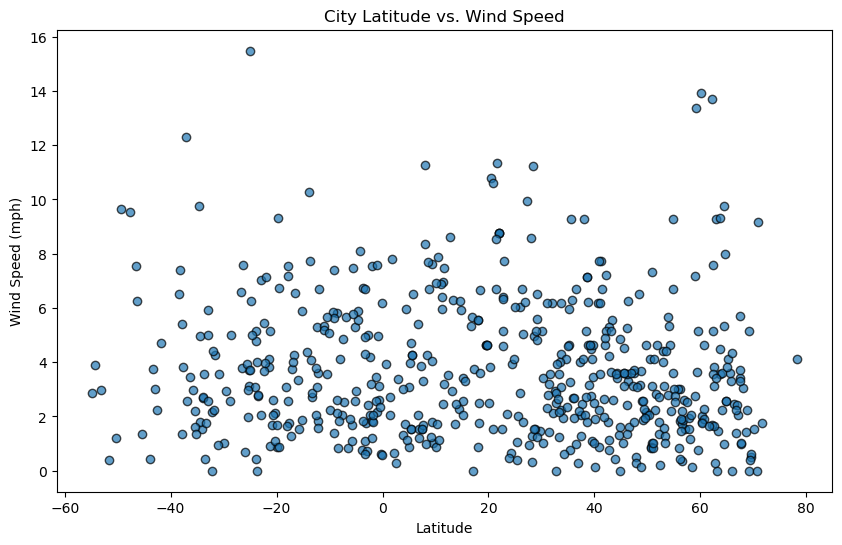

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties

# Set plot title and labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


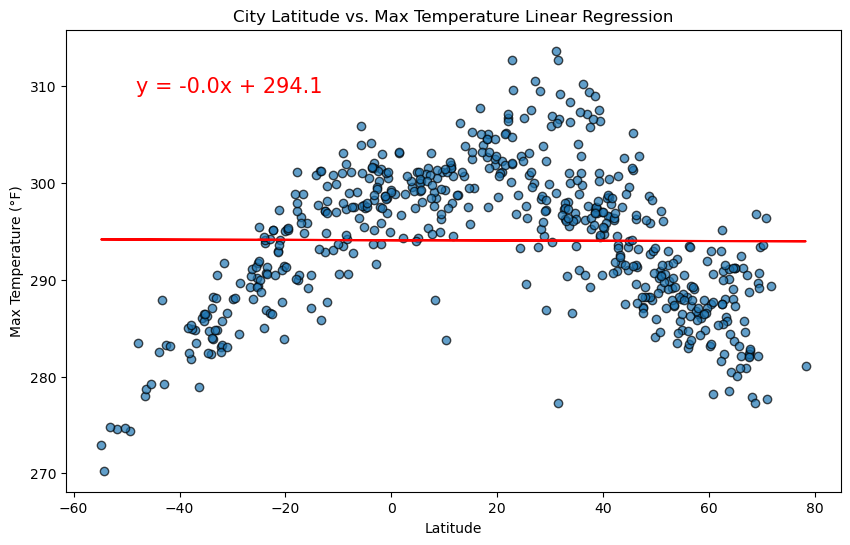

In [12]:
# Define a function to create Linear Regression plots

def create_linear_regression_plot(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.05
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.9
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")

    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
# Call the function with appropriate data
create_linear_regression_plot(city_data_df["Lat"], city_data_df["Max Temp"],
                              "Latitude", "Max Temperature (°F)",
                              "City Latitude vs. Max Temperature Linear Regression",
                              "output_data/lat_vs_temp_regression.png")

# Save the figure
plt.savefig("output_data/Fig5.png")
    
# Show the plot
plt.show()

In [ ]:
# test for success
# Call the function with appropriate data
# create_linear_regression_plot(city_data_df["Lat"], city_data_df["Max Temp"],
#                              "Latitude", "Max Temperature (°F)",
#                              "City Latitude vs. Max Temperature Linear Regression",
#                              "output_data/lat_vs_temp_regression.png")

In [ ]:
# test for success
# city_data_df.head()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
print(northern_hemi_df.head())

                  City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                     
2         longyearbyen  78.2186   15.6401    281.06        81           0   
3        fort st. john  56.2499 -120.8529    293.50        55         100   
5            shanhecun  44.7000  127.2000    293.38        91          55   
7               hadibu  12.6500   54.0333    298.81        80          98   
8           wadebridge  50.5173   -4.8363    290.18       100         100   

         Wind Speed Country        Date  
City_ID                                  
2              4.12      SJ  1691536278  
3              3.01      CA  1691536298  
5              1.33      CN  1691536613  
7              8.63      YE  1691536305  
8              4.12      GB  1691536344  


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
print(southern_hemi_df.head())

                  City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                     
0            adamstown -25.0660 -130.1015    295.49        86          93   
1                 nadi -17.8000  177.4167    301.15        54          20   
4            geraldton -28.7667  114.6000    284.38        93          75   
6        atafu village  -8.5421 -172.5159    301.99        69          92   
9               uturoa -16.7333 -151.4333    298.86        80          99   

         Wind Speed Country        Date  
City_ID                                  
0             15.48      PN  1691536266  
1              2.57      FJ  1691536437  
4              2.57      AU  1691536317  
6              5.81      TK  1691536268  
9              4.25      PF  1691536345  


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.4712421079036413


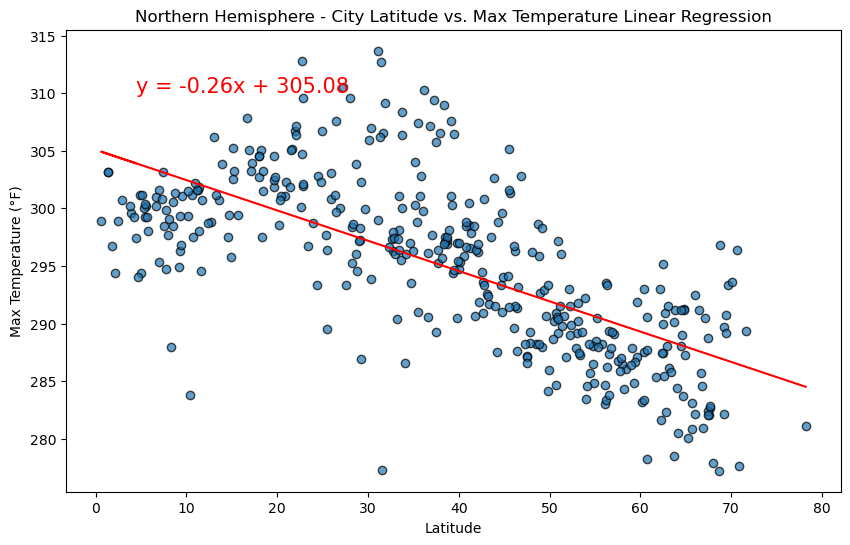

In [15]:
# Linear regression on Northern Hemisphere

# Define the create_linear_regression_plot function
def create_linear_regression_plot_north(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.05
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.9
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Create a DataFrame with Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression on Northern Hemisphere (using Max Temp vs. Latitude)
create_linear_regression_plot_north(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                              "Latitude", "Max Temperature (°F)",
                              "Northern Hemisphere - City Latitude vs. Max Temperature Linear Regression",
                              "output_data/northern_lat_vs_temp_regression.png")


The r-squared is: 0.7749973953812271


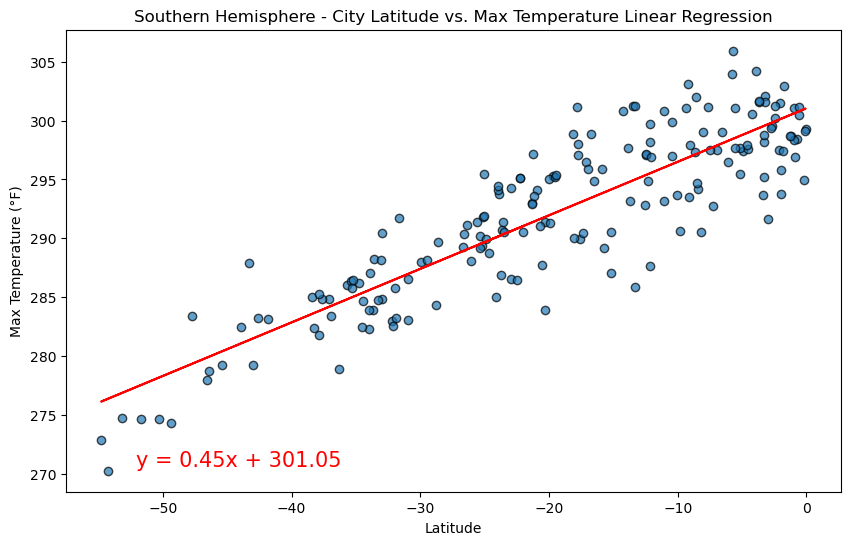

In [32]:
# Linear regression on Southern Hemisphere

# Define the create_linear_regression_plot function
def create_linear_regression_plot_south(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.05
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.01
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Create a DataFrame with Northern Hemisphere data (Latitude <= 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Perform linear regression on Northern Hemisphere (using Max Temp vs. Latitude)
create_linear_regression_plot_south(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                              "Latitude", "Max Temperature (°F)",
                              "Southern Hemisphere - City Latitude vs. Max Temperature Linear Regression",
                              "output_data/northern_lat_vs_temp_regression.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 3.895806234718867e-05


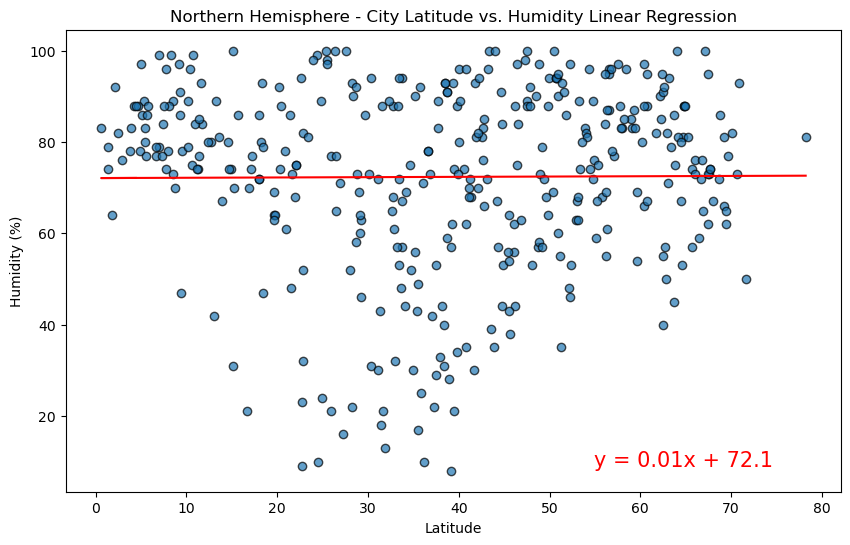

In [35]:
# Northern Hemisphere

# Define the create_linear_regression_plot_north function
def create_linear_regression_plot_north(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.7
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.01
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Perform linear regression on Northern Hemisphere (using Humidity vs. Latitude)
create_linear_regression_plot_north(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                              "Latitude", "Humidity (%)",
                              "Northern Hemisphere - City Latitude vs. Humidity Linear Regression")

The r-squared is: 0.005428225935516749


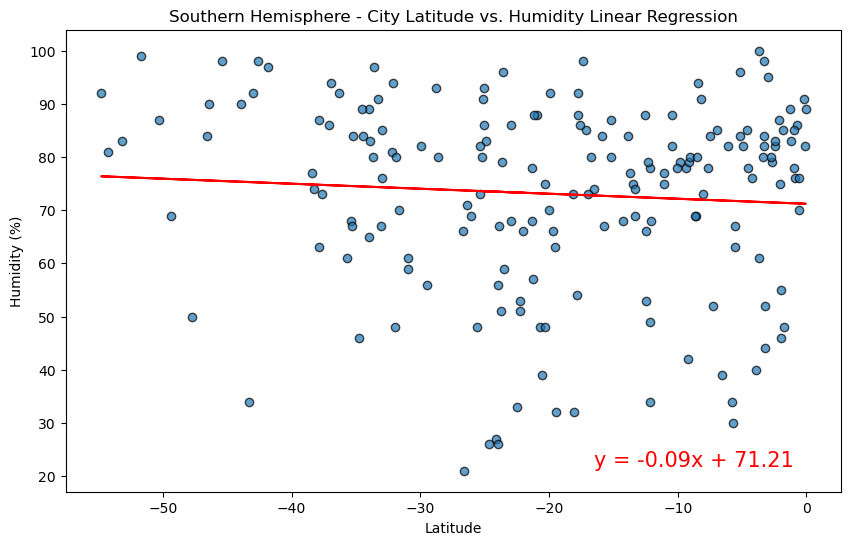

In [36]:
# Southern Hemisphere

# Define the create_linear_regression_plot_south function
def create_linear_regression_plot_south(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.7
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.01
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Perform linear regression on Southern Hemisphere (using Humidity vs. Latitude)
create_linear_regression_plot_south(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                              "Latitude", "Humidity (%)",
                              "Southern Hemisphere - City Latitude vs. Humidity Linear Regression")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.004003575076433278


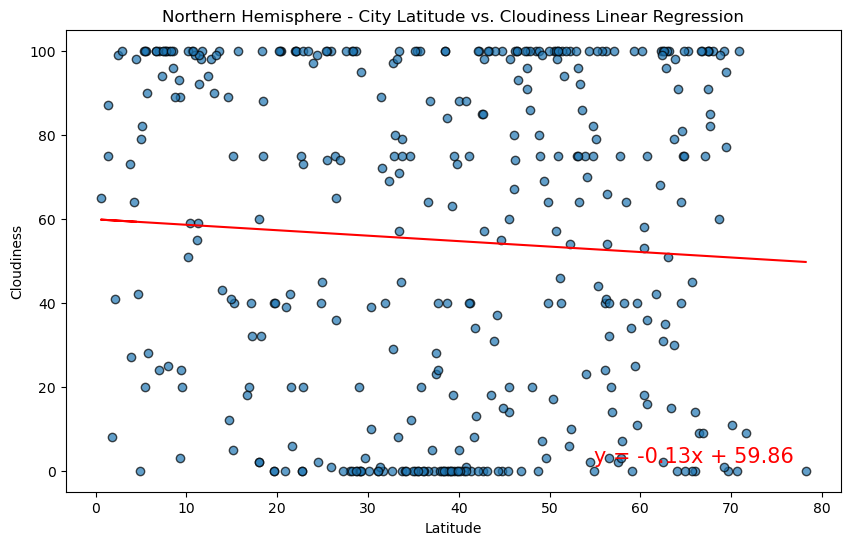

In [44]:
# Northern Hemisphere

# Define the create_linear_regression_plot_north function
def create_linear_regression_plot_north(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.7
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.02
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Perform linear regression on Northern Hemisphere (using Humidity vs. Latitude)
create_linear_regression_plot_north(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                              "Latitude", "Cloudiness",
                              "Northern Hemisphere - City Latitude vs. Cloudiness Linear Regression")


The r-squared is: 0.002238938073006635


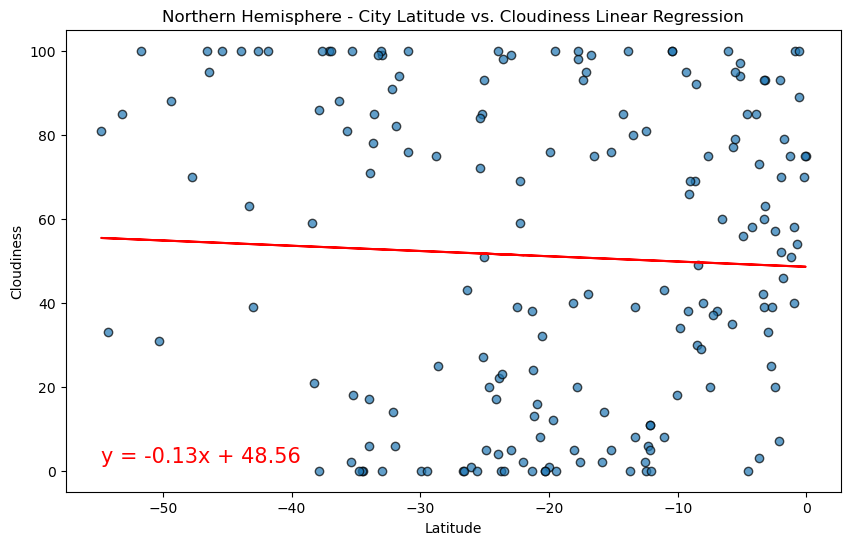

In [51]:
# Southern Hemisphere

# Define the create_linear_regression_plot_south function
def create_linear_regression_plot_south(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.0
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.02
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Perform linear regression on Southern Hemisphere (using Humidity vs. Latitude)
create_linear_regression_plot_south(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                              "Latitude", "Cloudiness",
                              "Northern Hemisphere - City Latitude vs. Cloudiness Linear Regression")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.01751318153109077


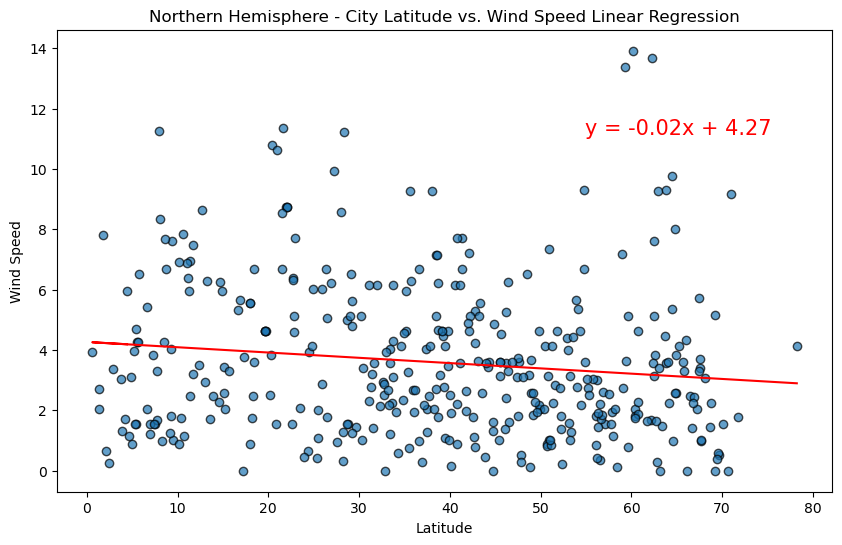

In [55]:
# Northern Hemisphere

# Define the create_linear_regression_plot_north function
def create_linear_regression_plot_north(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.7
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.8
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Perform linear regression on Northern Hemisphere (using Humidity vs. Latitude)
create_linear_regression_plot_north(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                              "Latitude", "Wind Speed",
                              "Northern Hemisphere - City Latitude vs. Wind Speed Linear Regression")


The r-squared is: 0.002403505276213506


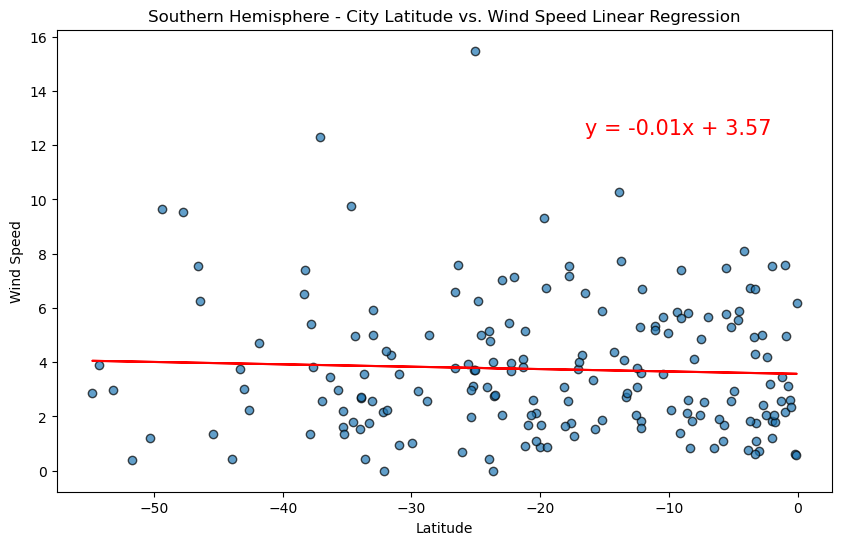

In [56]:
# Southern Hemisphere

# Define the create_linear_regression_plot_north function
def create_linear_regression_plot_south(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.7
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.8
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Perform linear regression on Southern Hemisphere (using Humidity vs. Latitude)
create_linear_regression_plot_south(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                              "Latitude", "Wind Speed",
                              "Southern Hemisphere - City Latitude vs. Wind Speed Linear Regression")

**Discussion about the linear relationship:** YOUR RESPONSE HERE